In [1]:
# https://keras.io/
!pip install -q keras

import keras


Using TensorFlow backend.


#Install Keras on a Jupyter Notebook using TensorFlow as a backend.

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Convolution2D
from keras.utils import np_utils


from keras.datasets import mnist
from keras.layers.normalization import BatchNormalization

##Import in python is similar to #include header_file in C/C++.
## Syntax:import module_name
##When import is used, it searches for the module initially in the local scope by calling __import__() function. The value returned by the function are then reflected in the output of the initial code.
## We also import a member from a module as:
##from module import member
##Before running any code,we just import all the necessary modules so that we can use the functions and methods included in them.

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


##Dataset of 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images. 
   ## x_train, x_test: uint8 array of grayscale image data with shape (num_samples, 28, 28).
   ## y_train, y_test: uint8 array of digit labels (integers in range 0-9) with shape (num_samples,).

(60000, 28, 28)


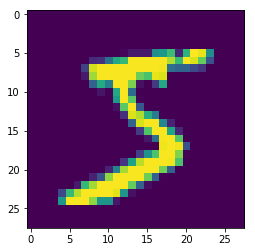

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

## X_train.shape returns the dataset of 60,000 28* 28 values of width and height of matrix
## plt.imshow(X_train[0]) display the first image of the dataset on a 2D regular raster.

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

## Our MNIST images only have a depth of 1, but we must explicitly declare that.

## In other words, we want to transform our dataset from having shape (n, width, height) to (n,  width, height,depth).

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

## This is the  final preprocessing step for the input data where we  convert our data type to float32 and normalize our data values to the range [0, 1].

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

## We should have 10 different classes,one for each digit,but we end up having only a 1D array.

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

## And it's a problem. The y_train and y_test data are not split into 10 distinct class labels, but rather are represented as a single array with the class values. That is why the conversion of 1D class arrays to 10D class matrices.

In [9]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

## We are displaying what we just converted.(After the conversion)

In [10]:
from keras.layers import Activation, MaxPooling2D, Dropout
from keras.layers.normalization import BatchNormalization
from keras.layers import Dense

model = Sequential() 

model.add(Convolution2D(16, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(Convolution2D(16, 3, 3, activation='relu'))
model.add(BatchNormalization())
model.add(Convolution2D(16, 3, 3, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.7))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(16, 3, 3, activation='relu'))
model.add(BatchNormalization())
model.add(Convolution2D(16, 3, 3, activation='relu'))
model.add(BatchNormalization())
model.add(Convolution2D(16, 3, 3, activation='relu'))
model.add(BatchNormalization())
model.add(Convolution2D(32, 3, 3, activation='relu'))
model.add(BatchNormalization())

model.add(Convolution2D(10, 3, 3))
model.add(BatchNormalization())


model.add(Flatten())
model.add(Activation('softmax'))



model.summary()

Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  import sys


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Con

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 16)        64        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 16)        2320      
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 16)        64        
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 16)        2320      
_________________________________________________________________
batch_normalization_3 (Batch (None, 22, 22, 16)        64        
_________________________________________________________________
dropout_1 (Dropout)          (None, 22, 22, 16)        0         
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [72]:
model.fit(X_train, Y_train, batch_size=4096, nb_epoch=35, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/35
60000/60000 [==============================] - 2s 41us/step - loss: 1.1153e-04 - acc: 1.0000
Epoch 2/35
60000/60000 [==============================] - 2s 40us/step - loss: 1.1210e-04 - acc: 1.0000
Epoch 3/35
60000/60000 [==============================] - 2s 40us/step - loss: 8.0313e-05 - acc: 1.0000
Epoch 4/35
60000/60000 [==============================] - 2s 40us/step - loss: 1.4250e-04 - acc: 1.0000
Epoch 5/35
60000/60000 [==============================] - 2s 40us/step - loss: 1.0200e-04 - acc: 1.0000
Epoch 6/35
60000/60000 [==============================] - 2s 40us/step - loss: 1.0307e-04 - acc: 1.0000
Epoch 7/35
60000/60000 [==============================] - 2s 40us/step - loss: 1.0297e-04 - acc: 1.0000
Epoch 8/35
60000/60000 [==============================] - 2s 40us/step - loss: 1.0624e-04 - acc: 1.0000
Epoch 9/35
60000/60000 [==============================] - 2s 40us/step - loss: 9.9287e-05 - acc: 1.0000
Epoch 10/35
60000/60000 [==============================] - 2s 40

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [74]:
print(score)

[0.04016836316106064, 0.992]


In [0]:
y_pred = model.predict(X_test)

In [76]:
print(y_pred[:9])
print(y_test[:9])

[[9.51517709e-09 8.62099512e-08 5.65046065e-10 1.39730867e-08
  5.81838151e-07 3.05874370e-09 1.43196530e-08 9.99999285e-01
  5.84760507e-08 8.96108673e-11]
 [1.04360032e-12 1.43251322e-11 1.00000000e+00 3.30693724e-14
  4.26163790e-15 7.14783376e-13 5.66147085e-09 6.25548658e-13
  2.70728036e-12 1.14438441e-11]
 [3.41725606e-11 9.99999881e-01 7.71905248e-11 6.46583942e-08
  3.64918790e-10 9.02208142e-10 9.01717923e-10 1.04403233e-08
  3.87836829e-09 7.32656658e-10]
 [1.00000000e+00 3.90048105e-10 1.99342501e-10 7.63001928e-09
  1.68773370e-10 5.19000565e-10 1.20588650e-09 2.04050318e-10
  1.34236598e-11 3.46023182e-10]
 [1.12393082e-08 1.12064935e-08 6.31326088e-07 3.81939724e-09
  9.99997854e-01 8.74497186e-09 1.01667467e-06 4.04981426e-09
  6.70036204e-09 3.95159674e-07]
 [1.85146198e-09 1.00000000e+00 5.55190172e-10 1.36674816e-09
  2.24602125e-11 6.91270929e-10 6.12982554e-10 6.97665037e-09
  7.55936869e-10 1.81601501e-09]
 [2.09492298e-12 2.55321719e-09 2.62025290e-10 2.41607434e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [78]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()

KeyError: ignored